# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from warnings import filterwarnings
filterwarnings('ignore')

from jcopml.plot import plot_missing_value
from jcopml.utils import save_model, load_model
from jcopml.automl import AutoClassifier
from jcopml.feature_importance import mean_score_decrease

# 2. Import Dataset

In [2]:
df = pd.read_csv("mushrooms.csv")
df.head()

,edible,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,False,convex,smooth,brown,True,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
1,True,convex,smooth,yellow,True,almond,free,close,broad,black,...,smooth,white,white,partial,white,1,pendant,brown,numerous,grasses
2,True,bell,smooth,white,True,anise,free,close,broad,brown,...,smooth,white,white,partial,white,1,pendant,brown,numerous,meadows
3,False,convex,scaly,white,True,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
4,True,convex,smooth,gray,False,none,free,crowded,broad,black,...,smooth,white,white,partial,white,1,evanescent,brown,abundant,grasses


### Data Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edible                    8124 non-null   bool  
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   bool  
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root                5644 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface_below_ring  8124 non-null   object
 14  stalk_color_above_ring  

In [4]:
df.shape

(8124, 23)

In [5]:
pd.options.display.max_columns = 100

In [6]:
df.head()

,edible,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,False,convex,smooth,brown,True,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,1,pendant,black,scattered,urban
1,True,convex,smooth,yellow,True,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,1,pendant,brown,numerous,grasses
2,True,bell,smooth,white,True,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,1,pendant,brown,numerous,meadows
3,False,convex,scaly,white,True,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,partial,white,1,pendant,black,scattered,urban
4,True,convex,smooth,gray,False,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,partial,white,1,evanescent,brown,abundant,grasses


### Data Description

In [7]:
df.describe()

,ring_number
count,8124.000000
mean,1.069424
std,0.271064
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [8]:
df.describe(include='O')

,cap_shape,cap_surface,cap_color,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_type,spore_print_color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,5644,8124,8124,7932,7932,8124,8124,8124,8124,8124,8124
unique,6,4,10,9,2,2,2,12,2,4,4,4,8,8,1,4,5,9,6,7
top,convex,scaly,brown,none,free,close,broad,buff,tapering,bulbous,smooth,smooth,white,white,partial,white,pendant,white,several,woods
freq,3656,3244,2284,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,3968,2388,4040,3148


### Check Missing Value

,missing_value,%
edible,0,0.00
cap_shape,0,0.00
cap_surface,0,0.00
cap_color,0,0.00
bruises,0,0.00
odor,0,0.00
gill_attachment,0,0.00
gill_spacing,0,0.00
gill_size,0,0.00
gill_color,0,0.00


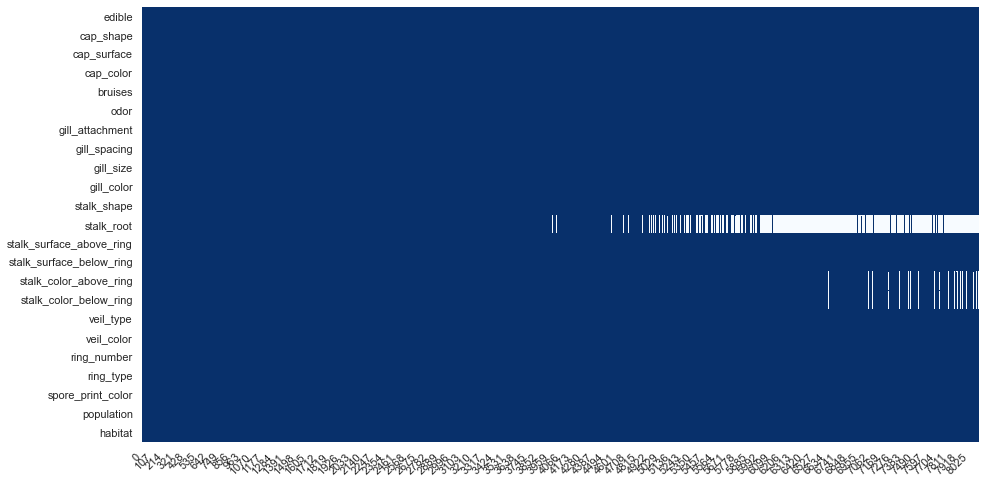

In [9]:
plot_missing_value(df, return_df= True)

## Check Imbalanced Dataset

<AxesSubplot:xlabel='edible', ylabel='count'>

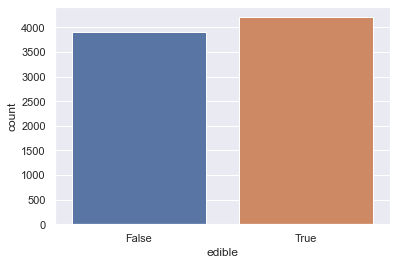

In [10]:
sns.countplot(df['edible'])

In [11]:
df.edible.value_counts()

True     4208
False    3916
Name: edible, dtype: int64

`The dataset is fairly balanced. Therefore, I can use 'accuracy' for the scoring of model`

## Assosiation Matrix

In [12]:
from jcopml.plot import plot_association_matrix

In [13]:
df.veil_type.value_counts()

partial    8124
Name: veil_type, dtype: int64

`Because the column of veil_type only has one value of category, I can eliminate it from the dataset.`

In [14]:
df.drop(columns='veil_type', inplace= True)

In [15]:
plot_association_matrix(df, target_col = 'edible', categoric_col='auto')

interactive(children=(ToggleButtons(description='method', options=("Cramer's V", 'Proficiency U(X|Y)', 'Profic…

`In this case, I use Cramer's V to get an association matrix against the target variable by setting a threshold is 0.6`

`Based on the association matrix, the column of odor, gill_color, ring_type, and spore_print_color that has higher effects against a mushroom is edible or not.`

# 3. Dataset Splitting

In [17]:
X = df[['odor','gill_color','ring_type','spore_print_color']]
y = df.edible

# 4. Modeling

In [26]:
model = AutoClassifier(num_feature=[], cat_feature=['odor','gill_color','ring_type','spore_print_color'])

In [27]:
model.fit(X, y, cv=3, scoring='accuracy')

Fitting 3 folds for each of 50 candidates, totalling 150 fits
================== Best Model Info ==================
algo                      | LogisticRegression
algo__C                   | 659.8711072054087
algo__fit_intercept       | False

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=False, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
num_imputer               | SimpleImputer(add_indicator=False, strategy='median')
numerical_scaler          | StandardScaler

=========== Score ===========
Train: 0.993845254237541
Valid: 0.9938453960417766
Test : 0.9975384615384615


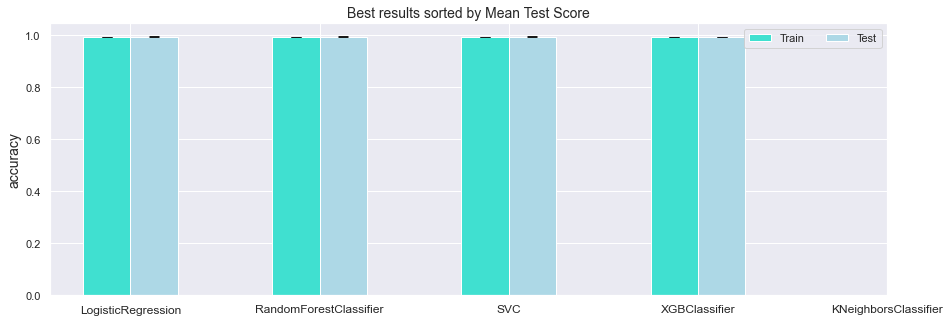

In [28]:
model.plot_results()

# 5. Features Importance

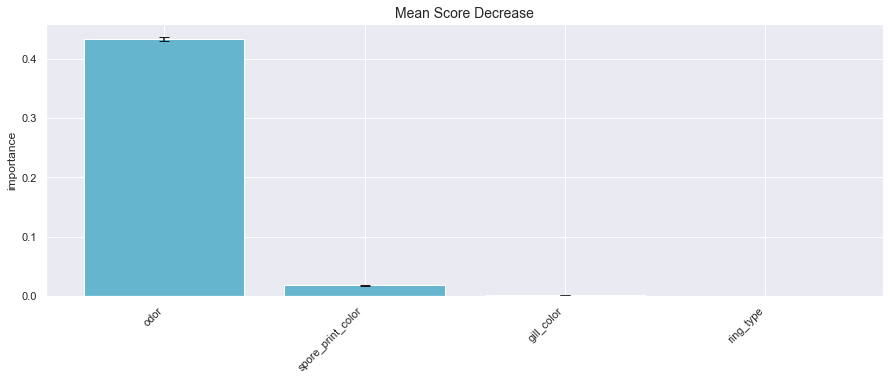

In [29]:
model.mean_score_decrease()

In [31]:
model = AutoClassifier(num_feature=[], cat_feature=['odor','spore_print_color'])

In [32]:
model.fit(X, y, cv=3, scoring='accuracy')

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[19:38:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
================== Best Model Info ==================
algo                      | XGBClassifier
algo__colsample_bytree    | 0.9556428757689247
algo__gamma               | 8
algo__learning_rate       | 0.1575132049977973
algo__max_depth           | 7
algo__n_estimators        | 182
algo__reg_alpha           | 0.0025113061677390002
algo__reg_lambda          | 0.06870614282613305
algo__subsample           | 0.4668543055695109

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=False, strategy='most_frequent')
categorical_encoder  

# 6. Evaluation

In [33]:
from jcopml.plot import plot_classification_report, plot_confusion_matrix, plot_roc_curve, plot_pr_curve

In [36]:
X_train = model.X_train
y_train = model.y_train
X_test = model.X_test
y_test = model.y_test

## 6.1. Classification Report

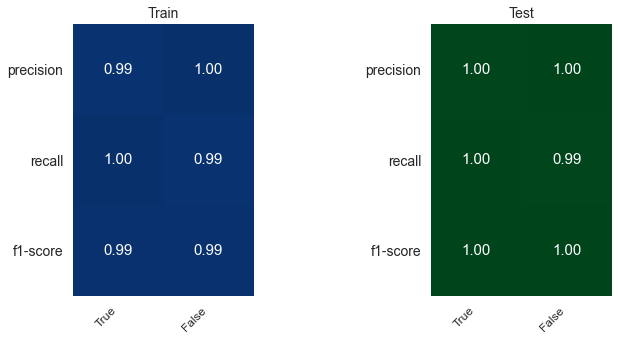

In [37]:
plot_classification_report(X_train, y_train, X_test, y_test, model)

In [38]:
plot_classification_report(X_train, y_train, X_test, y_test, model, report=True)

Train report
              precision    recall  f1-score   support

       False       1.00      0.99      0.99      3133
        True       0.99      1.00      0.99      3366

    accuracy                           0.99      6499
   macro avg       0.99      0.99      0.99      6499
weighted avg       0.99      0.99      0.99      6499


Test report
              precision    recall  f1-score   support

       False       1.00      0.99      1.00       783
        True       1.00      1.00      1.00       842

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



## 6.2. Confusion Matrix

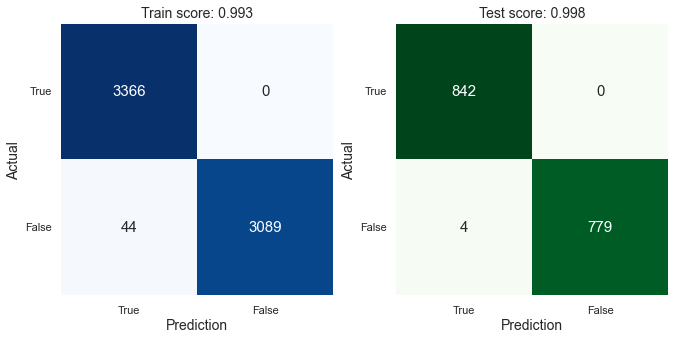

In [40]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model.model)

## 6.3. ROC AUC Curve

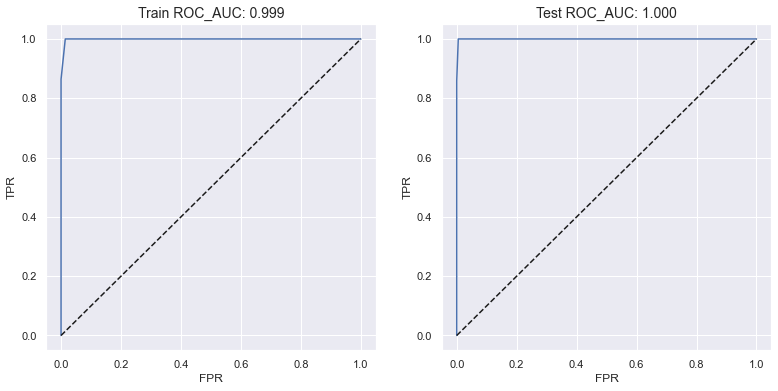

In [42]:
plot_roc_curve(X_train, y_train, X_test, y_test, model.model)

## 6.4. PR Curve

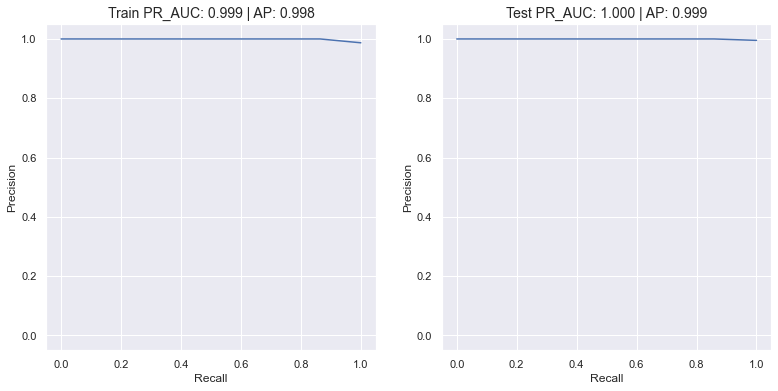

In [44]:
plot_pr_curve(X_train, y_train, X_test, y_test, model.model)

# Save Model

In [46]:
model.save(fname='Mushroom_Classification_Baseline')

Model is pickled as model/Mushroom_Classification_Baseline
